In [34]:
from itertools import combinations
import numpy as np
import pandas as pd
import seaborn as sns
from string import ascii_uppercase
import time as time

%matplotlib inline

Create a dictionary of all possible 1 to 6-tile leaves

In [5]:
tilebag = ['A']*9+['B']*2+['C']*2+['D']*4+['E']*12+\
          ['F']*2+['G']*3+['H']*2+['I']*9+['J']*1+\
          ['K']*1+['L']*4+['M']*2+['N']*6+['O']*8+\
          ['P']*2+['Q']*1+['R']*6+['S']*4+['T']*6+\
          ['U']*4+['V']*2+['W']*2+['X']*1+['Y']*2+\
          ['Z']*1+['?']*2
            
# leaves_1 = ascii_uppercase + '?'
# leaves_2 = sorted(list(set(list(combinations(tilebag,2)))))
# leaves_2 = [x[0]+x[1] for x in leaves_2]

In [7]:
maximum_superleave_length = 5
leaves = {i:sorted(list(set(list(combinations(tilebag,i))))) for i in 
          range(1,maximum_superleave_length+1)}

for i in range(1,maximum_superleave_length+1):
    leaves[i] = [''.join(leave) for leave in leaves[i]]

In [19]:
all_leaves = []

for i in range(1,4):
    all_leaves += leaves[i]

The bottom creates the full set of leaves for all lengths from 1-5 (6 breaks on my local machine)

In [8]:
for i in range(1,6):
    print(i,len(leaves[i]))

1 27
2 373
3 3509
4 25254
5 148150


In [9]:
column_dict = {
    0:'rack',
    1:'score',
    2:'tiles_remaining'
}
df = pd.read_csv('log_games.csv', header=None, keep_default_na=False)
df.rename(columns=column_dict,inplace=True)

In [10]:
tile_limit = 1
df = df.loc[df['tiles_remaining']>=tile_limit]

Alphabetize rack

In [11]:
df['rack'] = df['rack'].apply(lambda x: ''.join(sorted(x)))

Create flag of whether each letter is contained in a rack, and also check for multiples

In [14]:
for c in leaves[1]:
    for multiple in range(1,6):
        if multiple*c in leaves[multiple]:
            df[multiple*c] = df['rack'].apply(lambda x: multiple*c in x)

In [22]:
ev_df = pd.DataFrame(columns=['mean','std','count','ev','synergy'],
                     index=all_leaves)

To find all of the racks corresponding to a particular leave, we have added columns to the dataframe of plays df marking each letter (A, B, C...) and also for duplicates (AA, BB, CC...) and triplicates where possible (AAA, DDD, EEE...).

If the letters in a given leave are all different, we can look for rows by using df['A']&df['B']. However, if there are duplicates involved, we have to look for df['AA']. The following function gives the correct dataframe columns to be looked up.

In [24]:
def get_columns(leave):
    letters=list(set(leave))
    tags = []
    
    for l in letters:
        tags += [sum([l==letter for letter in leave])*l]
    
    return tags

In [32]:
ev_df

,mean,std,count,ev,synergy
?,NaN,NaN,NaN,NaN,NaN
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN


In [40]:
for leave_length in range(1,3):
    print(leave_length)
    t0 = time.time()
    
    for leave in leaves[leave_length]:
        condition = df[get_columns(leave)].all(axis=1)
        ev_df.loc[leave]['mean'] = df.loc[condition]['score'].mean()
        ev_df.loc[leave]['std'] = df.loc[condition]['score'].std()
        ev_df.loc[leave]['count'] = len(df.loc[condition])
        
    t1 = time.time()
    print('Calculated mean, std and count in {} seconds'.format(t1-t0))

1
Calculated mean, std and count in 68.65374279022217 seconds
2
Calculated mean, std and count in 530.9220550060272 seconds


In [41]:
ev_df['ev'] = ev_df['mean']-df['score'].mean()

In [42]:
ev_df

,mean,std,count,ev,synergy
?,54.9192,25.1511,1707622,19.4086,NaN
A,36.8361,18.8678,8316804,1.32554,NaN
B,35.1204,16.7445,2355819,-0.390212,NaN
C,36.3152,18.7269,2399229,0.804599,NaN
D,36.6047,18.7607,4293197,1.09413,NaN
E,37.4298,19.654,10163946,1.91925,NaN
F,35.5469,15.4998,2155441,0.0363451,NaN
G,34.4616,17.4353,4033589,-1.04899,NaN
H,37.9477,16.7506,1952294,2.43714,NaN
I,35.5348,18.8481,9795770,0.0242382,NaN


In [111]:
for leave in leaves[2]:
    ev_df.loc[leave]['synergy'] = ev_df.loc[leave]['ev']-ev_df.loc[leave[0]]['ev']-ev_df.loc[leave[1]]['ev']

KeyError: 'the label [?] is not in the [index]'

In [17]:
ev_df.to_csv('leave_values_010619_v2.csv')

In [20]:
ev_df

,mean,std,ev,synergy
A,36.8361,18.8678,1.32554,NaN
B,35.1204,16.7445,-0.390212,NaN
C,36.3152,18.7269,0.804599,NaN
D,36.6047,18.7607,1.09413,NaN
E,37.4298,19.654,1.91925,NaN
F,35.5469,15.4998,0.0363451,NaN
G,34.4616,17.4353,-1.04899,NaN
H,37.9477,16.7506,2.43714,NaN
I,35.5348,18.8481,0.0242382,NaN
J,36.2047,12.7758,0.694169,NaN


In [ ]:
df_short = df[:1000000]

In [ ]:
pts_per_turn = sns.lmplot('tiles_remaining','score',df_short,x_estimator=np.mean,fit_reg=False)

In [ ]:
pts_per_turn.savefig("pts_per_turn.png")

In [33]:
df['?'] = df['letters'].apply(lambda x: '?' in x)

,rack,score,tiles_remaining,letters,A,B,C,D,E,F,...,Q,R,S,T,U,V,W,X,Y,Z
0,NEZETOJ,40,86,"[N, E, Z, E, T, O, J]",False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,IUENERH,26,86,"[I, U, E, N, E, R, H]",False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
2,BIUTEOH,28,86,"[B, I, U, T, E, O, H]",False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,HBCLOIN,26,86,"[H, B, C, L, O, I, N]",False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,FSASIDO,30,80,"[F, S, A, S, I, D, O]",True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
5,TRANNIO,40,81,"[T, R, A, N, N, I, O]",True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
6,OLIEURG,62,80,"[O, L, I, E, U, R, G]",False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
7,MMAEEOU,30,75,"[M, M, A, E, E, O, U]",True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
8,IDYWRBL,22,75,"[I, D, Y, W, R, B, L]",False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
9,IEYCFEU,32,73,"[I, E, Y, C, F, E, U]",False,False,True,False,True,True,...,False,False,False,False,True,False,False,False,True,False


In [11]:
df.loc[df['E']]

,rack,score,tiles_remaining,letters,A,B,C,D,E,F,...,Q,R,S,T,U,V,W,X,Y,Z
0,NEZETOJ,40,86,"[N, E, Z, E, T, O, J]",False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,IUENERH,26,86,"[I, U, E, N, E, R, H]",False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
2,BIUTEOH,28,86,"[B, I, U, T, E, O, H]",False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
6,OLIEURG,62,80,"[O, L, I, E, U, R, G]",False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
7,MMAEEOU,30,75,"[M, M, A, E, E, O, U]",True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
9,IEYCFEU,32,73,"[I, E, Y, C, F, E, U]",False,False,True,False,True,True,...,False,False,False,False,True,False,False,False,True,False
10,OAAENFA,24,70,"[O, A, A, E, N, F, A]",True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
11,ONUSEDI,24,70,"[O, N, U, S, E, D, I]",False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
15,IEBTIOU,27,59,"[I, E, B, T, I, O, U]",False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
16,IHYCEEQ,35,54,"[I, H, Y, C, E, E, Q]",False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False


In [35]:
df_short = df[:5000000]

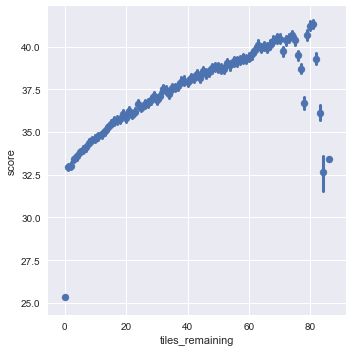

In [17]:
pts_per_turn_e = sns.lmplot('tiles_remaining','score',df_short.loc[df['E']],x_estimator=np.mean,fit_reg=False)

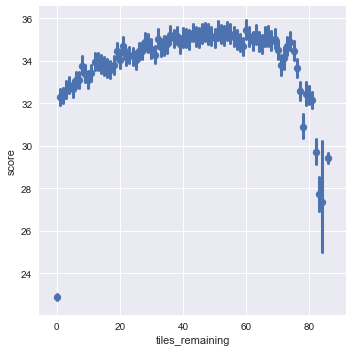

In [18]:
pts_per_turn_q = sns.lmplot('tiles_remaining','score',df_short.loc[df['Q']],x_estimator=np.mean,fit_reg=False)

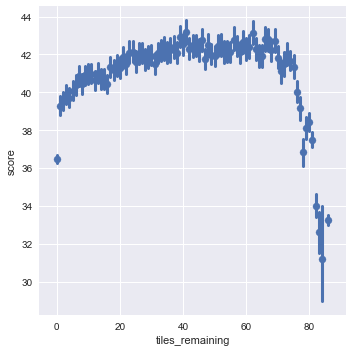

In [19]:
pts_per_turn_x = sns.lmplot('tiles_remaining','score',df_short.loc[df['X']],x_estimator=np.mean,fit_reg=False)

In [21]:
pts_per_turn_e.savefig("pts_per_turn_E.png")
pts_per_turn_q.savefig("pts_per_turn_Q.png")
pts_per_turn_x.savefig("pts_per_turn_X.png")

In [79]:
df.loc[df['E']]['score'].mean()

37.42981721862749

In [80]:
df.loc[df['Q']]['score'].mean()

34.08550761664485

In [81]:
df.loc[df['X']]['score'].mean()

40.7264021040094

In [82]:
df.loc[df['?']]['score'].mean()

54.91919347490253

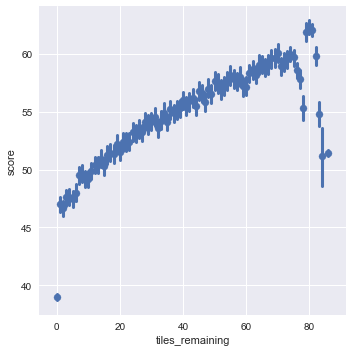

In [38]:
pts_per_turn_blank = sns.lmplot('tiles_remaining','score',df_short.loc[df['?']],x_estimator=np.mean,fit_reg=False)
pts_per_turn_blank.savefig("pts_per_turn_blank.png")